# Analysis

here is the performance analysis on some of the most successful models.
for more details on models and experiments, look at the [relavant markdown](../experiments.md). you can find model architectures in `src/models.py` file and model weights at `models` directory.

In [31]:
import torch as t

from torchvision import transforms
from torchvision.datasets import OxfordIIITPet
from torch.utils.data import DataLoader

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


from tqdm import tqdm

In [32]:
device = "cuda" if t.cuda.is_available() else "cpu"
device

'cuda'

In [33]:
import sys, os

project_root = os.path.abspath(os.path.join(".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [35]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ) # mean and standard deviation for each color channel
    #  these are numbers used in training model one ImageNet problem
])

dataset = OxfordIIITPet(
    root="../data/",
    download=True,
    target_types="category",
    transform=transform
)

dataloader = DataLoader(dataset, batch_size=8, shuffle=False)

## Confusion Matrix

### model 13

In [36]:
from src.models import PetBreedsRecogPreTrainedMobileNetV2

model_13 = PetBreedsRecogPreTrainedMobileNetV2()
model_13.load_state_dict(t.load("../models/model_13__breedsrecog_pretrained_featureextract_mobilenet_v2.pth"))
model_13.to(device)


f:\code\pet_recognition\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
f:\code\pet_recognition\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


PetBreedsRecogPreTrainedMobileNetV2(
  (model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(

In [37]:
y_preds = []
y_true = []

model_13.eval()
with t.inference_mode():
  
  for x, y in tqdm(dataloader, desc="Making predictions"):
    y_true.append(y.cpu())
    x, y = x.to(device), y.to(device)
    
    y_logit = model_13(x)
    y_pred = t.softmax(y_logit, dim=1).argmax(dim=1) # dim=1 is on the "logits" dimension, not "batch" dimension
    y_preds.append(y_pred.cpu()) # Put predictions on CPU for evaluation if it's not

y_pred_tensor = t.cat(y_preds) # Concatenate list of predictions into a tensor
y_true_tensor = t.cat(y_true)

Making predictions: 100%|██████████| 460/460 [04:11<00:00,  1.83it/s]


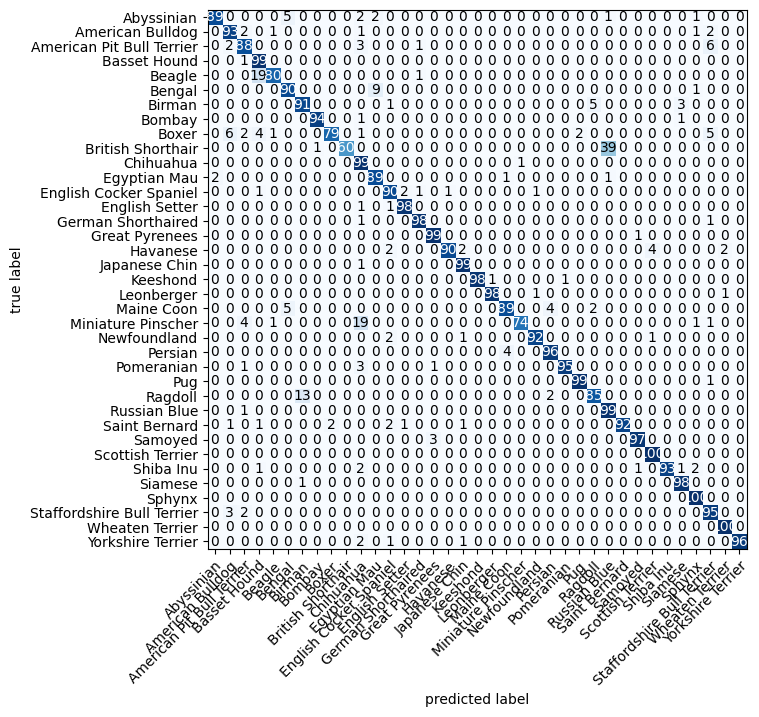

In [38]:
confmat = ConfusionMatrix(num_classes=len(dataset.classes), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=y_true_tensor)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=dataset.classes,
    figsize=(10, 7)
)

### model 14

In [39]:
from src.models import PetBreedsRecogPreTrainedMobileNetV2

model_14 = PetBreedsRecogPreTrainedMobileNetV2()
model_14.load_state_dict(t.load("../models/model_14__breedsrecog_pretrained_finetune_mobilenet_v2.pth"))
model_14.to(device)


f:\code\pet_recognition\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
f:\code\pet_recognition\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


PetBreedsRecogPreTrainedMobileNetV2(
  (model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(

In [40]:
y_preds = []
y_true = []

model_14.eval()
with t.inference_mode():
  
  for x, y in tqdm(dataloader, desc="Making predictions"):
    y_true.append(y.cpu())
    x, y = x.to(device), y.to(device)
    
    y_logit = model_14(x)
    y_pred = t.softmax(y_logit, dim=1).argmax(dim=1) # dim=1 is on the "logits" dimension, not "batch" dimension
    y_preds.append(y_pred.cpu()) # Put predictions on CPU for evaluation if it's not

y_pred_tensor = t.cat(y_preds) # Concatenate list of predictions into a tensor
y_true_tensor = t.cat(y_true)

Making predictions: 100%|██████████| 460/460 [02:47<00:00,  2.74it/s]


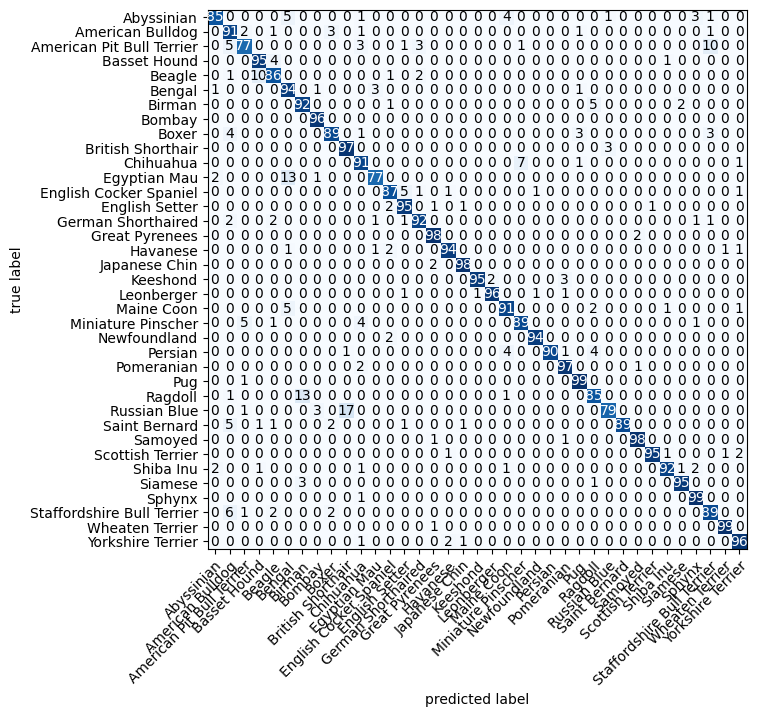

In [41]:
confmat = ConfusionMatrix(num_classes=len(dataset.classes), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=y_true_tensor)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=dataset.classes,
    figsize=(10, 7)
)

### model 15

In [42]:
from src.models import PetBreedsRecogPreTrainedResNet18

model_15 = PetBreedsRecogPreTrainedResNet18()
model_15.load_state_dict(t.load("../models/model_15__breedsrecog_pretrained_featureextract_resnet18.pth"))
model_15.to(device)

PetBreedsRecogPreTrainedResNet18(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1,

In [43]:
y_preds = []
y_true = []

model_15.eval()
with t.inference_mode():
  
  for x, y in tqdm(dataloader, desc="Making predictions"):
    y_true.append(y.cpu())
    x, y = x.to(device), y.to(device)
    
    y_logit = model_15(x)
    y_pred = t.softmax(y_logit, dim=1).argmax(dim=1) # dim=1 is on the "logits" dimension, not "batch" dimension
    y_preds.append(y_pred.cpu()) # Put predictions on CPU for evaluation if it's not

y_pred_tensor = t.cat(y_preds) # Concatenate list of predictions into a tensor
y_true_tensor = t.cat(y_true)

Making predictions: 100%|██████████| 460/460 [02:17<00:00,  3.34it/s]


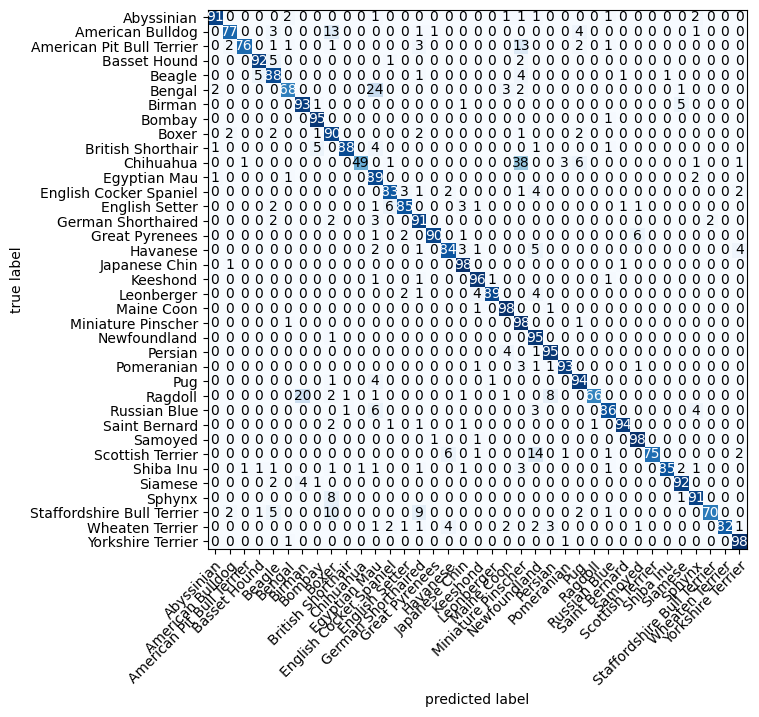

In [44]:
confmat = ConfusionMatrix(num_classes=len(dataset.classes), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=y_true_tensor)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=dataset.classes,
    figsize=(10, 7)
)

### model 16

In [45]:
from src.models import PetBreedsRecogPreTrainedEfficientNetB0

model_16 = PetBreedsRecogPreTrainedEfficientNetB0()
model_16.load_state_dict(t.load("../models/model_16__breedsrecog_pretrained_featureextract_efficientnet_b0.pth"))
model_16.to(device)

PetBreedsRecogPreTrainedEfficientNetB0(
  (model): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=Tru

In [46]:
y_preds = []
y_true = []

model_16.eval()
with t.inference_mode():
  
  for x, y in tqdm(dataloader, desc="Making predictions"):
    y_true.append(y.cpu())
    x, y = x.to(device), y.to(device)
    
    y_logit = model_16(x)
    y_pred = t.softmax(y_logit, dim=1).argmax(dim=1) # dim=1 is on the "logits" dimension, not "batch" dimension
    y_preds.append(y_pred.cpu()) # Put predictions on CPU for evaluation if it's not

y_pred_tensor = t.cat(y_preds) # Concatenate list of predictions into a tensor
y_true_tensor = t.cat(y_true)

Making predictions: 100%|██████████| 460/460 [03:02<00:00,  2.52it/s]


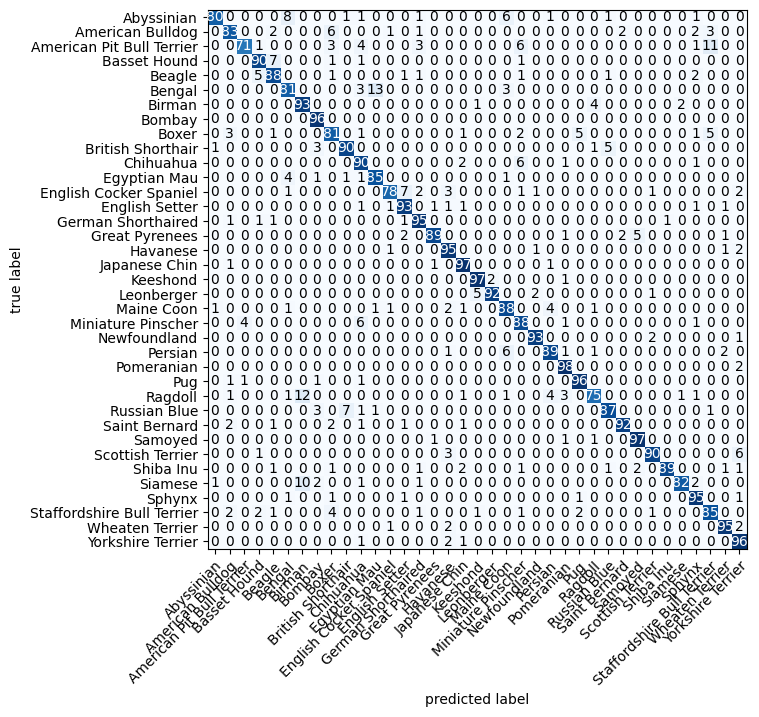

In [47]:
confmat = ConfusionMatrix(num_classes=len(dataset.classes), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=y_true_tensor)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=dataset.classes,
    figsize=(10, 7)
)

### model 17

In [48]:
from src.models import PetBreedsRecogPreTrainedEfficientNetB0

model_17 = PetBreedsRecogPreTrainedEfficientNetB0()
model_17.load_state_dict(t.load("../models/model_17__breedsrecog_pretrained_finetune_efficientnet_b0.pth"))
model_17.to(device)

PetBreedsRecogPreTrainedEfficientNetB0(
  (model): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=Tru

In [49]:
y_preds = []
y_true = []

model_17.eval()
with t.inference_mode():
  
  for x, y in tqdm(dataloader, desc="Making predictions"):
    y_true.append(y.cpu())
    x, y = x.to(device), y.to(device)
    
    y_logit = model_17(x)
    y_pred = t.softmax(y_logit, dim=1).argmax(dim=1) # dim=1 is on the "logits" dimension, not "batch" dimension
    y_preds.append(y_pred.cpu()) # Put predictions on CPU for evaluation if it's not

y_pred_tensor = t.cat(y_preds) # Concatenate list of predictions into a tensor
y_true_tensor = t.cat(y_true)

Making predictions: 100%|██████████| 460/460 [02:18<00:00,  3.32it/s]


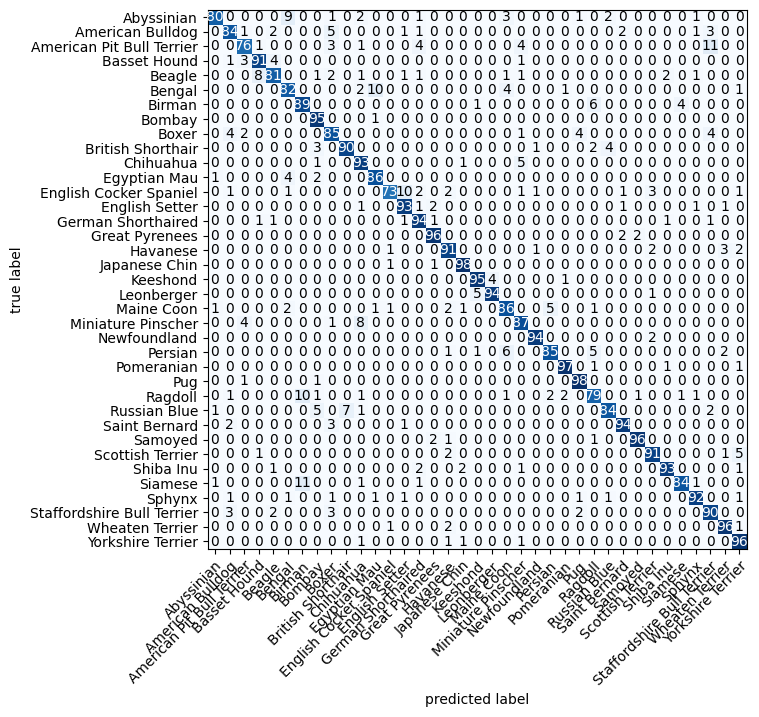

In [50]:
confmat = ConfusionMatrix(num_classes=len(dataset.classes), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=y_true_tensor)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=dataset.classes,
    figsize=(10, 7)
)

### model 18

In [52]:
from src.models import PetBreedsRecogPreTrainedMobileNetV3

model_18 = PetBreedsRecogPreTrainedMobileNetV3()
model_18.load_state_dict(t.load("../models/model_18__breedsrecog_pretrained_featureextract_mobilenet_v3.pth"))
model_18.to(device)

PetBreedsRecogPreTrainedMobileNetV3(
  (model): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
            (activation): ReLU()
            (scale_activation): Hardsigmoid()
         

In [53]:
y_preds = []
y_true = []

model_18.eval()
with t.inference_mode():
  
  for x, y in tqdm(dataloader, desc="Making predictions"):
    y_true.append(y.cpu())
    x, y = x.to(device), y.to(device)
    
    y_logit = model_18(x)
    y_pred = t.softmax(y_logit, dim=1).argmax(dim=1) # dim=1 is on the "logits" dimension, not "batch" dimension
    y_preds.append(y_pred.cpu()) # Put predictions on CPU for evaluation if it's not

y_pred_tensor = t.cat(y_preds) # Concatenate list of predictions into a tensor
y_true_tensor = t.cat(y_true)

Making predictions: 100%|██████████| 460/460 [00:44<00:00, 10.43it/s]


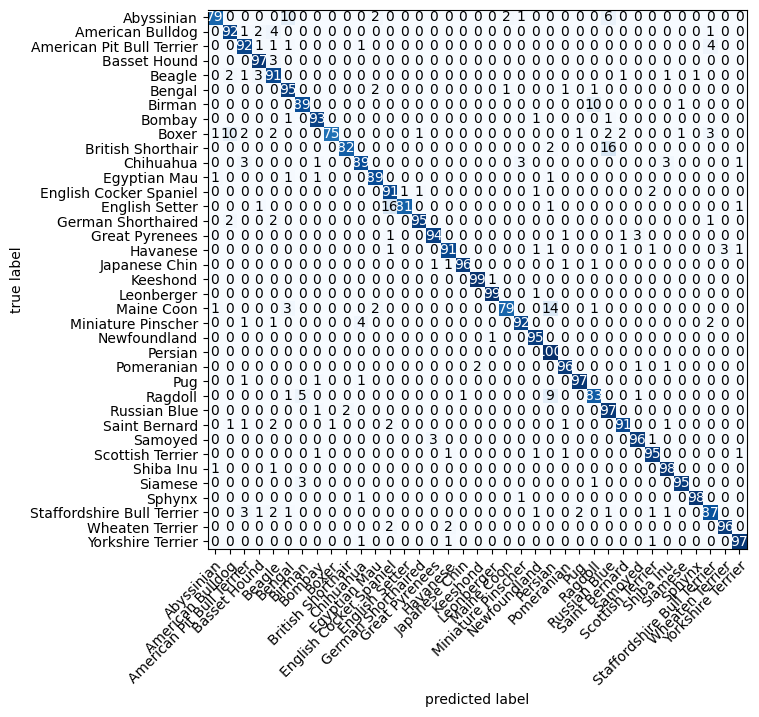

In [54]:
confmat = ConfusionMatrix(num_classes=len(dataset.classes), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=y_true_tensor)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=dataset.classes,
    figsize=(10, 7)
)

### model 19

In [55]:
from src.models import PetBreedsRecogPreTrainedMobileNetV3

model_19 = PetBreedsRecogPreTrainedMobileNetV3()
model_19.load_state_dict(t.load("../models/model_18__breedsrecog_pretrained_featureextract_mobilenet_v3.pth"))
model_19.to(device)

PetBreedsRecogPreTrainedMobileNetV3(
  (model): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
            (activation): ReLU()
            (scale_activation): Hardsigmoid()
         

In [56]:
y_preds = []
y_true = []

model_19.eval()
with t.inference_mode():
  
  for x, y in tqdm(dataloader, desc="Making predictions"):
    y_true.append(y.cpu())
    x, y = x.to(device), y.to(device)
    
    y_logit = model_19(x)
    y_pred = t.softmax(y_logit, dim=1).argmax(dim=1) # dim=1 is on the "logits" dimension, not "batch" dimension
    y_preds.append(y_pred.cpu()) # Put predictions on CPU for evaluation if it's not

y_pred_tensor = t.cat(y_preds) # Concatenate list of predictions into a tensor
y_true_tensor = t.cat(y_true)

Making predictions: 100%|██████████| 460/460 [01:32<00:00,  4.99it/s]


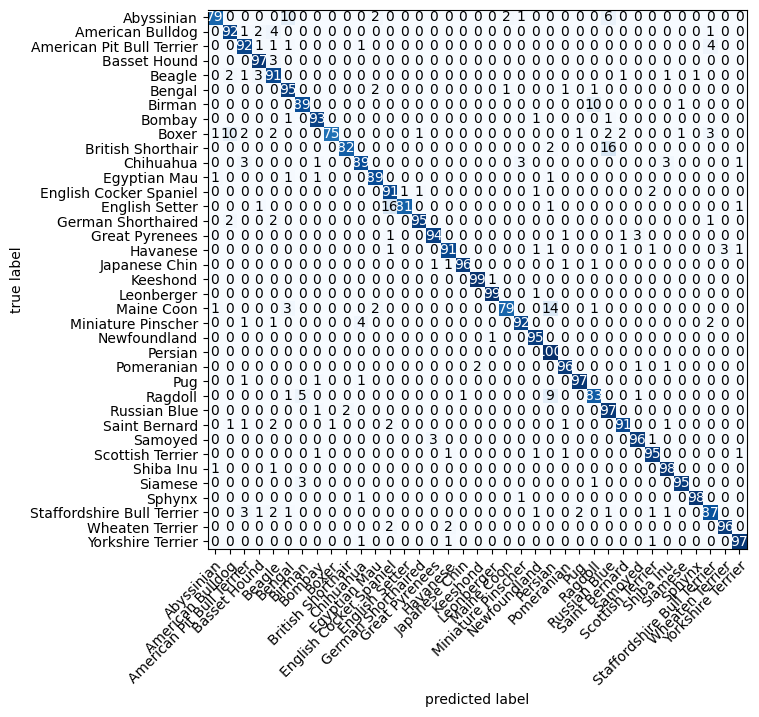

In [57]:
confmat = ConfusionMatrix(num_classes=len(dataset.classes), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=y_true_tensor)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=dataset.classes,
    figsize=(10, 7)
)

## Accuracy Table

I used an overfit index like this:
$$
\text{Overfit Index} = \frac{A_{train}-A_{test}}{A{test}}*100
$$
under 10 is okey.

some details on models accuracy

model index | model name | training method | accuracy on train data | accuracy on test data | learning time | accuracy index
---|---|---|:---:|:---:|:---:|:---:
13 | MobileNet V2 | feature extract | 95.99 | 85.33 | 2025 | 12.49
14 | MobileNet V2 | fine tune | 92.96 | 88.58 | 2421 | 04.94
15 | ResNet 18 | fine tune | 95.48 | 73.09 | 2260 | 30.63
16 | EfficientNet b0 | feature extract | 90.38 | 86.41 | 2299 | 04.59
17 | EfficientNet b0 | fine tune | 89.67 | 84.78 | 2301 | 05.76
18 | MobileNet V3 | feature extract | 95.61 | 79.34 | 2435 | 20.05
19 | MobileNet V3 | fine tune | 91.10 | 83.96 | 1901 | 08.50

## epoch-loss plot

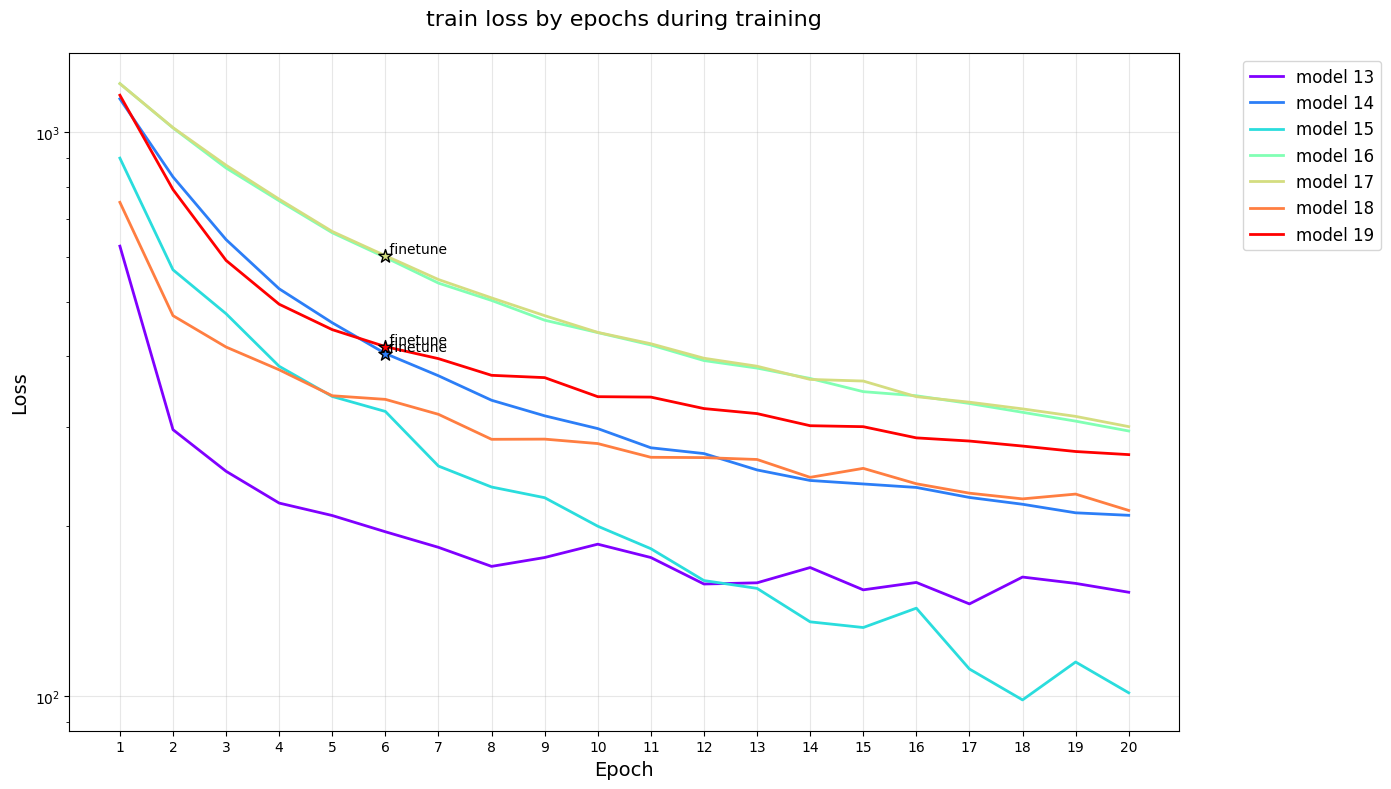

In [58]:
import matplotlib.pyplot as plt
import numpy as np


models = {
    "model 13": [
        627.193497210741, 296.44069066643715, 250.1282778531313, 219.66876972466707, 
        208.78418096527457, 195.3811812484637, 183.3437040783465, 169.62748143076897, 
        175.88262029364705, 185.72357198176906, 175.8746707260143, 157.851230006665, 
        158.62252208963037, 168.83395702997223, 154.1298102173023, 158.85925243142992, 
        145.53149625076912, 162.39680461841635, 158.24795548710972, 152.62473891256377
    ],
    "model 14": [
        1144.4444634914398, 832.1231826543808, 644.1364095211029, 526.922719180584, 
        458.66025799512863, 404.52193224430084, 369.41794365644455, 334.28317525982857, 
        313.6946943998337, 297.7504475712776, 275.3107729703188, 268.87535017728806, 
        251.4853989034891, 240.90420266985893, None, 234.14072681963444, 
        224.76877158135176, 218.61519815027714, 211.10922230780125, 208.95960349962115
    ],
    "model 15": [
        898.4128633141518, 569.4255219399929, 475.93361650407314, 383.99166238307953, 
        339.4772923439741, 319.32122905924916, 255.49813161417842, 234.55711001344025, 
        224.54181181639433, 199.87826238945127, 182.32954698614776, 160.09410419873893, 
        155.05987930949777, 135.25611167866737, 132.1545193658676, 143.02430854877457, 
        111.55557688942645, 98.33810705982614, 114.80089500872418, 101.23259816970676
    ],
    "model 16": [
        1217.9891784191132, 1016.3267788887024, 862.9189001321793, 754.7283246517181, 
        662.4334119558334, 598.999404668808, 539.3183450698853, 502.4701461791992, 
        463.5139807462692, 440.66223526000977, 418.90176421403885, 393.08573311567307, 
        381.1789300441742, 365.3804070651531, 346.22139117121696, 340.44976300001144, 
        329.89475670456886, 318.23450353741646, 306.9516511261463, 294.85318760573864
    ],
    "model 17": [
        1217.6927936077118, 1017.619083404541, 872.7235282659531, 759.6861160993576, 
        665.8681279420853, 603.1910520792007, 547.2118337154388, 507.7261085510254, 
        472.21606266498566, 441.0216094851494, 421.02173775434494, 396.834845662117, 
        384.0993186533451, 363.9455943107605, 361.5533020198345, 339.20350420475006, 
        331.6569611430168, 322.7000236660242, 312.9666806459427, 300.1557802259922
    ],
    "model 18": [
        750.0477274060249, 472.1994064003229, 415.4004752486944, 378.5403856188059, 
        340.4806291908026, 335.4834839850664, 315.61730998009443, 285.00090880692005, 
        285.2142367400229, 280.08437560498714, 264.8213483430445, 264.496435623616, 
        262.46735134813935, 244.01285494491458, 253.1249573091045, 237.69082155637443, 
        228.72976906690747, 223.46348185744137, 227.87884776387364, 213.15924902632833
    ],
    "model 19": [
        1161.5775635242462, 790.3239207267761, 591.6434963941574, 494.7524176090956, 
        445.9883885383606, 416.11276364326477, 396.15985372662544, 370.09851460158825, 
        366.626371845603, 339.1929488927126, 338.61429522931576, 323.1123569533229, 
        316.5488931685686, 301.2735814861953, 300.08365738391876, 286.67273046821356, 
        282.997614108026, 277.2514775916934, 271.1470742672682, 267.7297163680196
    ]
}


plt.figure(figsize=(14, 8))
plt.title('train loss by epochs during training', fontsize=16, pad=20)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True, alpha=0.3)

colors = plt.cm.rainbow(np.linspace(0, 1, len(models)))

for (name, data), color in zip(models.items(), colors):
    epochs = np.arange(1, len(data)+1)
    valid_data = [(e, d) for e, d in zip(epochs, data) if d is not None]
    x = [e for e, d in valid_data]
    y = [d for e, d in valid_data]
    
    plt.plot(x, y, label=name, color=color, linewidth=2)
    
    if name in ["model 14", "model 17", "model 19"]:
        finetune_epoch = 6 if name == "model 14" else 6 if name == "model 17" else 6
        if finetune_epoch <= len(data) and data[finetune_epoch-1] is not None:
            plt.scatter(finetune_epoch, data[finetune_epoch-1], color=color, s=100, 
                       edgecolors='black', zorder=5, marker='*')
            plt.text(finetune_epoch, data[finetune_epoch-1], ' finetune', 
                    verticalalignment='bottom', fontsize=10)

plt.xticks(np.arange(1, 21))
plt.yscale('log')
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()